<a href="https://colab.research.google.com/github/ajou-y0uC4N/y0uC4N/blob/main/DNN_case1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import requests
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import drive

In [20]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/type1.csv")
print(df.head())

     type      time  isCan0  priority  messageID  isService  serviceNODEID  \
0  Normal  0.000000       1        16        341          0              1   
1  Normal  0.192053       1        16      20000          0              1   
2  Normal  0.192335       1        31       1081          0              1   
3  Normal  0.192504       1        31       1081          0              1   
4  Normal  0.192637       1        31       1081          0              1   

   byteSize  data[0]  data[1]  data[2]  data[3]  data[4]  data[5]  data[6]  \
0         8        0        0        0        0        8        0        0   
1         2        0      192       -1       -1       -1       -1       -1   
2         8      186       84        0        0        0      246        0   
3         8        0      248        0        0      247      255      223   
4         4      254        0        0       64       -1       -1       -1   

   data[7]  7byteNullCnt  8byteNullCnt  
0      192           

In [22]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df["type"])
X = df.drop(columns=["type","time"])

print(f"X shape: {X.shape}")
print(f"y shape: {y_encoded.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X shape: (207858, 16)
y shape: (207858,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

In [24]:
model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2176      
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6337 (24.75 KB)
Trainable params: 6337 (24.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
4158/4158 [==============================] - 30s 6ms/step - loss: 0.0671 - accuracy: 0.9857 - val_loss: 0.0644 - val_accuracy: 0.9867
Epoch 2/10
4158/4158 [==============================] - 14s 3ms/step - loss: 0.0633 - accuracy: 0.9869 - val_loss: 0.0641 - val_accuracy: 0.9867
Epoch 3/10
4158/4158 [==============================] - 14s 3ms/step - loss: 0.0632 - accuracy: 0.9869 - val_loss: 0.0632 - val_accuracy: 0.9867
Epoch 4/10
4158/4158 [==============================] - 13s 3ms/step - loss: 0.0631 - accuracy: 0.9869 - val_loss: 0.0635 - val_accuracy: 0.9867
Epoch 5/10
4158/4158 [==============================] - 16s 4ms/step - loss: 0.0631 - accuracy: 0.9869 - val_loss: 0.0636 - val_accuracy: 0.9867
Epoch 6/10
4158/4158 [==============================] - 15s 4ms/step - loss: 0.0629 - accuracy: 0.9869 - val_loss: 0.0644 - val_accuracy: 0.9867
Epoch 7/10
4158/4158 [==============================] - 14s 3ms/step - loss: 0.0631 - accuracy: 0.9869 - val_loss: 0.0637 - val_ac

In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(y_test.shape)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_,digits=6))

1300/1300 [==============================] - 3s 3ms/step - loss: 0.0604 - accuracy: 0.9875
(41572,)
Test loss: 0.06038337200880051
Test accuracy: 0.9875156283378601
1300/1300 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

      Attack   0.978465  1.000000  0.989115     23581
      Normal   1.000000  0.971152  0.985365     17991

    accuracy                       0.987516     41572
   macro avg   0.989232  0.985576  0.987240     41572
weighted avg   0.987784  0.987516  0.987492     41572



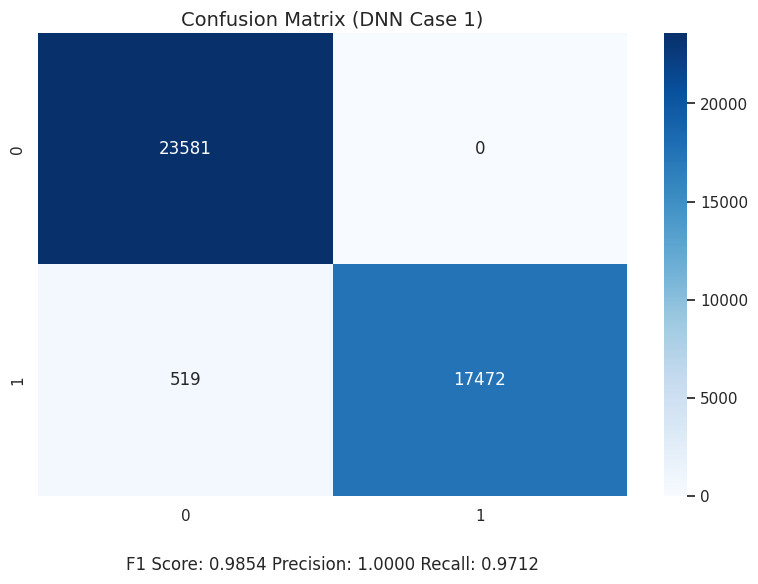

In [27]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
cm1 = confusion_matrix(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
# 혼동 행렬 heatmap 그리기
ax.set_title('Confusion Matrix (DNN Case 1)', fontsize=14)
ax.set_xlabel('Predicted Label', fontsize=12)
ax.set_ylabel('True Label', fontsize=12)
ax.text(0.5, -0.15, f'F1 Score: {f1_1:.4f} Precision: {precision_1:.4f} Recall: {recall_1:.4f}',
        horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
        fontsize=12)

# heatmap
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", ax=ax)

# subplot 간 간격 조절
plt.tight_layout()
plt.show()

In [28]:
model.save('my_dnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
